In [2]:
import pandas as pd
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load ranked analysis

queries_df = pd.read_csv('./niaid_queries.csv', sep=',')
queries_df

,combination,search term,result id
0,original query,influenza,PRJNA658522
1,original query,influenza,PRJNA658529
2,original query,influenza,PRJNA658552
3,original query,influenza,PRJNA658564
4,original query,influenza,PRJNA658562
...,...,...,...
3995,c15,hiv,VIVLI_02021d26-0e96-424c-8fec-77cbd204fd8d
3996,c15,hiv,VIVLI_7a8a7234-ada3-465b-a608-347b5e74a542
3997,c15,hiv,VIVLI_7ac8687d-79c8-4860-8141-83776849e2df
3998,c15,hiv,VIVLI_242c4b5a-19b3-4a51-b885-05358ed89db6


In [22]:
scores_df = ranked_df.drop('result id', axis = 1)
scores_df

,original query,combi 1,combi 2,combi 3,combi 4,combi 5,combi 6,combi 7,combi 8,combi 9,combi 10,combi 11,combi 12,combi 13,combi 14,combi 15
0,1.500000,1.333333,1.333333,1.200000,0.000000,0.000000,1.333333,1.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000,1.400000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,3.666667,11.000000,22.000000,11.000000,0.000000,7.333333,22.000000,22.000000,22.000000,2.444444,11.000000,22.000000,22.000000,22.000000
3,0.000000,0.000000,0.000000,0.000000,2.200000,3.666667,0.000000,0.000000,0.000000,1.833333,3.666667,0.000000,0.000000,0.000000,0.000000,1.100000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.857143,2.166667,0.000000,0.000000,0.000000,2.600000,4.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,5.666667,5.666667,5.666667,5.666667,5.666667,5.666667,5.666667,5.666667,5.666667,5.666667,5.666667,5.666667,5.666667,5.666667,5.666667,5.666667
475,16.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,16.000000,8.000000,8.000000,8.000000,8.000000
476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.300000,1.625000
477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.700000


In [23]:
def perform_wilcoxon_test(data):
    # Get the column names
    columns = data.columns
    
    # Initialize a list to hold the results
    results = []
    
    # Perform the Wilcoxon signed-rank test for each pair of columns
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1 = columns[i]
            col2 = columns[j]
            stat, p = wilcoxon(data[col1], data[col2])
            results.append((col1, col2, stat, p))
            
    # Create a DataFrame from the results
    results_df = pd.DataFrame(results, columns=['set 1', 'set 2', 'statistic', 'p-value'])
    return results_df

In [24]:
def perform_mann_whitney_u_test(data):
    # Get the column names
    columns = data.columns
    
    # Initialize a list to hold the results
    results = []
    
    # Perform the Mann-Whitney U test for each pair of columns
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1 = columns[i]
            col2 = columns[j]
            u, p = mannwhitneyu(data[col1], data[col2])
            results.append((col1, col2, u, p))
            
    # Create a DataFrame from the results
    results_df = pd.DataFrame(results, columns=['set 1', 'set 2', 'u', 'p-value'])
    return results_df

In [25]:
def create_heatmap(df, test_name):
    combination_order = ['original query', 'combi 1', 'combi 2', 'combi 3', 'combi 4', 'combi 5', 'combi 6',
                         'combi 7', 'combi 8', 'combi 9', 'combi 10', 'combi 11', 'combi 12', 'combi 13',
                         'combi 14', 'combi 15']
    
    heatmap_data = df.pivot('set 1', 'set 2', 'p-value')
    
    # Reorder index and columns
    
    heatmap_data = heatmap_data.reindex(combination_order, axis = 0)
    heatmap_data = heatmap_data.reindex(combination_order, axis = 1)
    
    # Create heatmap using seaborn

    plt.figure(figsize = (16, 8))
    sns.heatmap(heatmap_data, cmap = 'BuPu_r', annot = True, fmt = '.3f')
    plt.title(f'Heatmap of p-values | {test_name}')
    plt.show()

In [26]:
wilcoxon_df = perform_wilcoxon_test(scores_df)

In [27]:
wilcoxon_df

,set 1,set 2,statistic,p-value
0,original query,combi 1,3243.5,0.025692
1,original query,combi 2,8314.0,0.264264
2,original query,combi 3,15310.0,0.288329
3,original query,combi 4,22511.0,0.594062
4,original query,combi 5,26966.5,0.508277
...,...,...,...,...
115,combi 12,combi 14,13157.0,0.991653
116,combi 12,combi 15,18844.5,0.839677
117,combi 13,combi 14,7663.5,0.854068
118,combi 13,combi 15,13651.5,0.926213


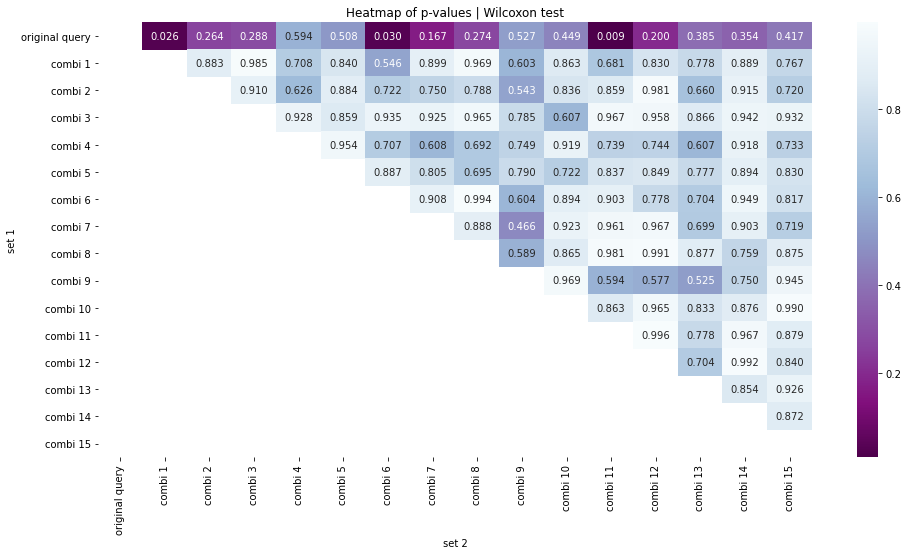

In [28]:
create_heatmap(wilcoxon_df, 'Wilcoxon test')

In [18]:
mann_whitney_u_df = perform_mann_whitney_u_test(scores_df)
mann_whitney_u_df

,set 1,set 2,u,p-value
0,original query,combi 1,109225.0,0.082836
1,original query,combi 2,109006.5,0.074639
2,original query,combi 3,109440.0,0.091210
3,original query,combi 4,109412.5,0.090077
4,original query,combi 5,109328.0,0.086659
...,...,...,...,...
115,combi 12,combi 14,114284.5,0.456823
116,combi 12,combi 15,114071.5,0.435831
117,combi 13,combi 14,114529.0,0.481034
118,combi 13,combi 15,114375.0,0.465756


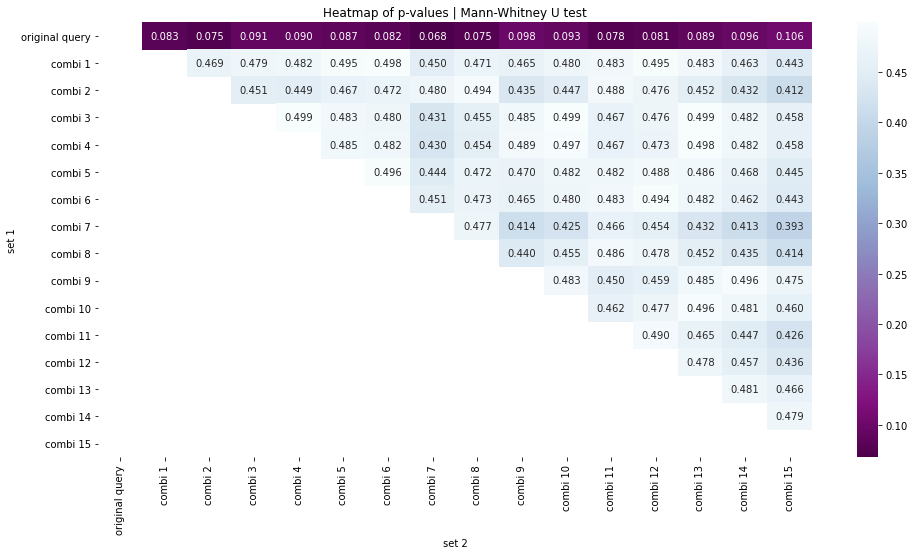

In [19]:
create_heatmap(mann_whitney_u_df, 'Mann-Whitney U test')